In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML

#Read the dataset with the necessary features
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [2]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


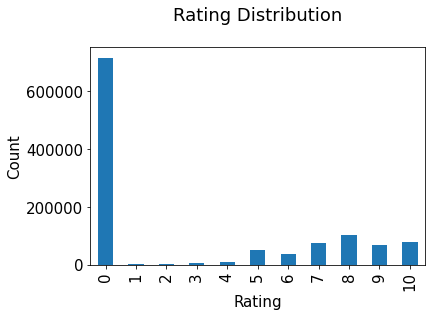

In [3]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.savefig('system1.png', bbox_inches='tight')
plt.show()

In [4]:
#Recommendation Based on Rating Counts
rating_count = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
rating_count_top5=rating_count.sort_values('bookRating', ascending=False).head()
rating_count_top5=rating_count_top5.reset_index()
rating_count_top5=rating_count_top5['ISBN'].values.tolist()

most_rated_books = pd.DataFrame(rating_count_top5, index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_final=most_rated_books_summary.drop(columns=['imageUrlS','imageUrlM'])
# Rendering the dataframe as HTML table
HTML(most_rated_books_final.to_html(escape=False, formatters=dict(imageUrlL=path_to_image_html)))

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlL
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,


In [6]:
#Recommendations based on correlations
#We use Pearsons’R correlation coefficient to measure the linear correlation between two variables,
#in our case, the ratings for two books.
#we need to find out the average rating, and the number of ratings each book received
#First, we need to find out the average rating, and the number of ratings each book received.
average_rating = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['bookRating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()
#In this data set, the book that received the most rating counts was not highly rated at all. 
#As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here.
#So, we need to have a better system.

,bookRating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


In [7]:
#To ensure statistical significance, users with less than 200 ratings, and books with less than 100 ratings are excluded.
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)]

In [8]:
#Rating matrix
#We convert the ratings table to a 2D matrix. The matrix will be sparse because not every user rated every book.
ratings_pivot = ratings.pivot(index='userID', columns='ISBN').bookRating
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(905, 207699)


ISBN,0330299891,0375404120,0586045007,9022906116,9032803328,9044922564,9044922572,9044922718,9044923161,904492401X,...,UNGRANDHOMMED,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
userID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#sample isbn: 0316666343 , 0440225701 , 0345334531
isbn=input("Enter the ISBN : ")
bones_ratings = ratings_pivot[isbn]
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns=['pearsonR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(average_rating['ratingCount'])
corr=corr_summary[corr_summary['ratingCount']>=300].sort_values('pearsonR', ascending=False).head(11)
corr=corr.reset_index()
print(corr)
l=corr['ISBN'].values.tolist()
del l[0] #Remove the entered book from the list

Enter the ISBN : 0345334531


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


          ISBN  pearsonR  ratingCount
0   0440211727  1.000000          517
1   0440206154  1.000000          365
2   0345361792  0.985037          412
3   0060930535  0.563178          494
4   0786868716  0.539331          427
5   0440236673  0.494889          408
6   0060928336  0.429666          732
7   0385504209  0.395377          883
8   0312195516  0.382899          723
9   0060976845  0.375000          434
10  0345370775  0.350393          466


In [17]:
books_corr_to_bones = pd.DataFrame(l,index=np.arange(10), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_bones, books, on='ISBN')

In [18]:
corr_books=corr_books.drop(columns=['imageUrlS','imageUrlM'])
# Rendering the dataframe as HTML table
HTML(corr_books.to_html(escape=False, formatters=dict(imageUrlL=path_to_image_html)))

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlL
0,0440206154,Red Dragon,Thomas Harris,2000,Dell Publishing Company,
1,0345361792,A Prayer for Owen Meany,John Irving,1990,Ballantine Books,
2,0060930535,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,
3,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,
4,0440236673,The Brethren,John Grisham,2000,Island,
5,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,
6,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,
7,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,
8,0060976845,Little Altars Everywhere: A Novel,Rebecca Wells,1996,Perennial,
9,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books,
